In [1]:
"""
Check all datasets
"""
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
from ipywidgets import interact
from ipywidgets import Controller

from collections import defaultdict
import numpy as np
import os
import sys
import itertools
from tqdm import tqdm
import pandas as pd
import regex as re
sys.path.append('/export/home/asanakoy/workspace/neural_network')
sys.path.append('/export/home/asanakoy/workspace/art_datasets')
sys.path.append('/export/home/asanakoy/workspace/dataset_merger')
import make_data.dataset
import wikiart.info.preprocess_info
from art_utils.pandas_tools import is_null_object
from art_utils.text_tools import extract_all_years
import dataset_merger.read_datasets
import dataset_merger.pymongoext as pymongoext
from dataset_merger.match_artists import fix_sim_matrix
from dataset_merger.match_artists import generate_matches_for_manual_check
from dataset_merger.match_artists import get_num_top_matches
from dataset_merger.match_artists import compute_sim_matrix
from dataset_merger.prepare_artists import get_artists_with_years

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 50)  
pd.set_option('display.max_columns', None) 

# todo: merge wga, wikiart, artuk, googleart (dates checked)
# todo: make uniform dates (bio or active if no bio available) range for every artist in the dataset

# todo: check dates on others
# todo: use url_wiki to compare
# todo: chach should we split naems on `&` for other datasets (beyound artuk, wikiart, googleart, wga)

In [2]:
dfs = dataset_merger.read_datasets.read_datasets()

artuk
artuk 207585
googleart
googleart 105965
moma
moma 25872
rijks
rijks 96189
wga
wga 35884
wiki
wiki 132302
meisterwerke
meisterwerke 19647
Total works count: 623444
time: 31 s


In [3]:
# for key, df in dfs.iteritems():
#     print key
#     print df.columns
#     print '==='
    

# print '--'
# artist_names = np.unique(artist_names)
# print 'Total unique artists num:', len(artist_names)
# return artist_names

time: 1.61 ms


In [3]:
artists_with_years_dict = dict()
artists_with_years_dict['googleart'] = get_artists_with_years('googleart', dfs)
artists_with_years_dict['wiki'] = get_artists_with_years('wiki', dfs)
artists_with_years_dict['wga'] = get_artists_with_years('wga', dfs)
artists_with_years_dict['artuk'] = get_artists_with_years('artuk', dfs)



100%|██████████| 4446/4446 [00:00<00:00, 41678.03it/s]

with url_wiki: 3208
4446
4381



100%|██████████| 2277/2277 [00:00<00:00, 46895.14it/s]


2277
2271


100%|██████████| 4747/4747 [00:00<00:00, 55916.83it/s]


4747
4747


100%|██████████| 37074/37074 [00:00<00:00, 38793.53it/s]


37074
33444
time: 8.64 s


In [4]:
artists_with_years_dict['googleart'].sort_values(by='artist_slug')

,artist_id,bio,page_url,total_items_count,url_wiki,artist_slug,years_bio,artist_name,names,years,years_work,years_range
artist_id,,,,,,,,,,,,
t219hrtp_0b,t219hrtp_0b,,https://www.google.com/culturalinstitute/beta/...,6,None,0331с,NaN,0331с,"[0331c, 0331с]","[2007.0, 2007.0, 2007.0, 2007.0, 2007.0, 2008.0]","[2007.0, 2008.0]","[2007.0, 2008.0]"
t219d95g7wr,t219d95g7wr,,https://www.google.com/culturalinstitute/beta/...,3,None,1010,NaN,1010,[1010],"[2015.0, 2014.0, 2014.0]","[2014.0, 2015.0]","[2014.0, 2015.0]"
m04f2tbb,m04f2tbb,108 is an Italian artist in the field of stree...,https://www.google.com/culturalinstitute/beta/...,5,http://en.wikipedia.org/wiki/108_%28artist%29,108,"[1978, 1978]",108,[108],"[2014.0, 2014.0, 2014.0, 2012.0, 2008.0]","[2008.0, 2014.0]","[2008.0, 2014.0]"
t218rckcn7q,t218rckcn7q,,https://www.google.com/culturalinstitute/beta/...,6,None,12-brillos-crew,NaN,12 brillos crew,"[12 brillos crew, colectivo 12 brillos]","[2013.0, 2012.0, 2011.0, 2013.0, 2009.0, 2009.0]","[2009.0, 2013.0]","[2009.0, 2013.0]"
t219hrtq0_b,t219hrtq0_b,,https://www.google.com/culturalinstitute/beta/...,8,None,123-klan,NaN,123 klan,"[123 klan, 123klan]","[2015.0, 2015.0, 2013.0, 2015.0, 2014.0]","[2013.0, 2015.0]","[2013.0, 2015.0]"
t218rckcnvy,t218rckcnvy,,https://www.google.com/culturalinstitute/beta/...,6,None,2501,NaN,2501,[2501],"[2008.0, nan, 2014.0, 2014.0, 2014.0]","[2008.0, 2014.0]","[2008.0, 2014.0]"
t218rckcp3w,t218rckcp3w,,https://www.google.com/culturalinstitute/beta/...,9,None,2rise,NaN,2rise,[2rise],"[2014.0, 2014.0, 2014.0, 2014.0, 2014.0, 2014....","[2014.0, 2014.0]","[2014.0, 2014.0]"
t218rckcpkj,t218rckcpkj,,https://www.google.com/culturalinstitute/beta/...,6,None,3ttman,NaN,3ttman,[3ttman],"[2008.0, 2008.0, 2010.0, 2013.0, 2014.0]","[2008.0, 2014.0]","[2008.0, 2014.0]"
t219d95g9t6,t219d95g9t6,,https://www.google.com/culturalinstitute/beta/...,4,None,4b,NaN,4b,[4b],"[2014.0, 2014.0, 2014.0, 2014.0]","[2014.0, 2014.0]","[2014.0, 2014.0]"


time: 233 ms


In [6]:
# artcyclopedia_artists = pymongoext.get_db_entries('129.206.117.36', 27017, 'artcyclopedia', 'found')
# for x in artcyclopedia_artists:
#     x['artcylopedia_name'] = x['name']
#     del x['name']
#     del x['_id']
#     if 'content' in x:
#         del x['content']
# print len(artcyclopedia_artists)
# print artcyclopedia_artists[:2]

# artcyclopedia_df = pd.DataFrame.from_dict(artcyclopedia_artists)
# artcyclopedia_df.index = artcyclopedia_df['artist_name']
# artcyclopedia_df.rename(columns={'url': 'url_artcyclopedia'}, inplace=True)

# # artists_df['url_artcyclopedia'] = artcyclopedia_df.loc[artist_names, 'url_artcyclopedia'].values
# # print pd.notnull(artists_df['url_artcyclopedia']).sum()
# print len(artcyclopedia_df)
# print len(artcyclopedia_df['url_artcyclopedia'].unique())


# artcyclopedia_df

time: 2.93 ms


In [5]:
sim_matrix = dict()

time: 1.75 ms


100%|██████████| 4747/4747 [2:04:49<00:00,  1.50s/it]  


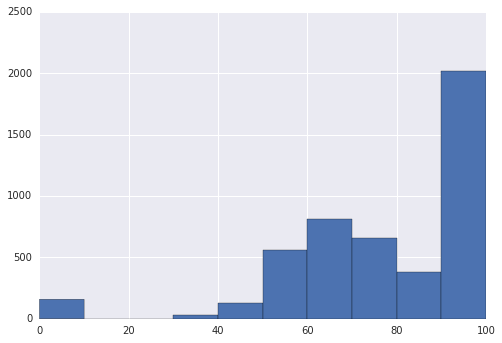

time: 2h 5min 3s


In [18]:
keys = ['wga', 'artuk']
matrix_filepath = 'sim_matrix_wga-artuk.npy'
if os.path.exists(matrix_filepath) and False:
    sim_matrix['wga-artuk'] = np.load(matrix_filepath)
else:
    sim_matrix['wga-artuk'] = compute_sim_matrix(keys, artists_with_years_dict)
    np.save(matrix_filepath, sim_matrix['wga-artuk'])
best_sim = sim_matrix['wga-artuk'].max(axis=1)
plt.hist(best_sim)
plt.show()

In [53]:
%autoreload
sim = sim_matrix['wga-artuk']

dataset_names = ['wga', 'artuk']
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

manually_checked_matches_df = pd.read_csv('{}_manually_corrected_matches.csv'.format('-'.join(dataset_names)), 
                                                                                     index_col=0, encoding='utf-8')

sim = fix_sim_matrix(dataset_names, 
                     dfs_to_merge, 
                       sim, 
                       manually_checked_matches_df)

dataset_names = dataset_names[::-1]
dfs_to_merge = dfs_to_merge[::-1]
sim = sim.transpose()


output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format(
            '-'.join(dataset_names))
generate_matches_for_manual_check(dataset_names, dfs_to_merge, 
                                  sim, min_sim=90, 
                                  max_sim=95,
                                  min_k=1,
                                  output_path=output_path)

count: 14
14


,score,names_artuk,dates_artuk,names_wga,dates_wga,is_same,artist_id_artuk,artist_id_wga,idx
0,91.0,"[bout, peeter]","[1644, 1711]","[bout, pieter]","[1658, 1719]",False,"bout, peeter, & boudewyns, adriaen frans, (16...","bout, pieter, (1658-1719)","(3106, 472)"
1,90.0,"[brescianino, andrea, active]","[1545, 1545]","[brescianino, andrea del]","[1506, 1525]",False,"brescianino, andrea, active & brescianino, ra...","brescianino, andrea del, (1506-1525)","(3425, 509)"
2,90.0,"[brescianino, andrea, active]","[1545, 1545]","[brescianino, andrea del]","[1485, 1545]",False,"brescianino, andrea, active & brescianino, ra...","brescianino, andrea del, (1485-1545)","(3425, 508)"
3,90.0,"[constable, j.]","[1850.0, 1850.0]","[constable, john]","[1776, 1837]",False,"constable, j.","constable, john, (1776-1837)","(6133, 838)"
4,93.0,[master of the view of saint gudule],"[1465, 1500]",[master of the view of ste gudule],"[1480, 1480]",False,"master of the view of saint gudule, (1465-1500)","master of the view of ste gudule, (1480-1480)","(19476, 2378)"
5,91.0,"[moore, henry]","[1831, 1895]","[moret, henry]","[1856, 1913]",False,"moore, henry, (1831-1895)","moret, henry, (1856-1913)","(20921, 2931)"
6,93.0,"[morrison, william]","[1856.0, 1898.0]","[morris, william]","[1834, 1896]",False,"morrison, william","morris, william, (1834-1896)","(21185, 2943)"
7,90.0,"[teniers ii, david]","[1612, 1653]","[teniers, david the elder]","[1582, 1649]",False,"teniers ii, david, & peeters, gillis, (1612-1...","teniers, david the elder, (1582-1649)","(29131, 3985)"
8,92.0,"[van balen i, hendrik]","[1568, 1625]","[balen, hendrick van]","[1575, 1632]",False,"van balen i, hendrik, & brueghel the elder, j...","balen, hendrick van, (1575-1632)","(30173, 163)"
9,92.0,"[van de veen, adriaen]","[1589, 1680]","[velde, adriaen van de]","[1636, 1672]",False,"van de veen, adriaen, (1589-1680)","velde, adriaen van de, (1636-1672)","(30227, 4459)"


time: 7.72 s


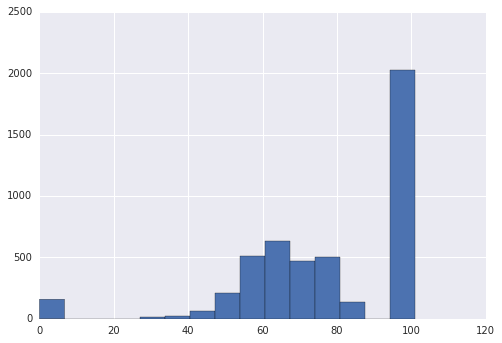

time: 302 ms


In [10]:
best_sim = sim.max(axis=1)
plt.hist(best_sim, bins=15)
plt.show()

In [11]:
dfs['wiki']

,artist_slug,artwork_slug,date,genre,image_id,image_url,keywords,title,page_url,style,technique,description,location_created,media,location,list_of_styles,century,artist_name,year,artist_names,years_bio,artist_url_wiki,nationality,image_path
image_id,,,,,,,,,,,,,,,,,,,,,,,,
3d_3d-1984,3d,3d-1984,1984,graffiti,3d_3d-1984,http://uploads7.wikiart.org/images/3d/3d-1984.jpg,NaN,NaN,http://www.wikiart.org/en/3d/3d-1984,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1984.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_agent-blue-1991,3d,agent-blue-1991,1991,symbolic,3d_agent-blue-1991,http://uploads6.wikiart.org/images/3d/agent-bl...,NaN,NaN,http://www.wikiart.org/en/3d/agent-blue-1991,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1991.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_in-baghdad,3d,in-baghdad,NaN,symbolic,3d_in-baghdad,http://uploads1.wikiart.org/images/3d/in-baghd...,NaN,NaN,http://www.wikiart.org/en/3d/in-baghdad,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,NaN,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_naked-lunch-1994,3d,naked-lunch-1994,1994,symbolic,3d_naked-lunch-1994,http://uploads7.wikiart.org/images/3d/naked-lu...,NaN,NaN,http://www.wikiart.org/en/3d/naked-lunch-1994,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1994.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_no-great-crime-1983,3d,no-great-crime-1983,1983,graffiti,3d_no-great-crime-1983,http://uploads2.wikiart.org/images/3d/no-great...,NaN,NaN,http://www.wikiart.org/en/3d/no-great-crime-1983,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1983.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_robert-de-niro-taxi-driver-1988,3d,robert-de-niro-taxi-driver-1988,1988,graffiti,3d_robert-de-niro-taxi-driver-1988,http://uploads5.wikiart.org/images/3d/robert-d...,NaN,NaN,http://www.wikiart.org/en/3d/robert-de-niro-ta...,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1988.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_serious-art-1986,3d,serious-art-1986,1986,graffiti,3d_serious-art-1986,http://uploads8.wikiart.org/images/3d/serious-...,NaN,NaN,http://www.wikiart.org/en/3d/serious-art-1986,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1986.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_untitled-headz,3d,untitled-headz,NaN,symbolic,3d_untitled-headz,http://uploads5.wikiart.org/images/3d/untitled...,NaN,NaN,http://www.wikiart.org/en/3d/untitled-headz,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,NaN,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...
3d_vivisection-1988,3d,vivisection-1988,1988,symbolic,3d_vivisection-1988,http://uploads7.wikiart.org/images/3d/vivisect...,NaN,NaN,http://www.wikiart.org/en/3d/vivisection-1988,street art,NaN,NaN,NaN,NaN,NaN,[street art],20,3d,1988.0,"[3d, robert del naja]","[1966, 1966]",http://en.wikipedia.org/wiki/robert_del_naja,british,/export/home/asanakoy/workspace/wikiart/images...


time: 285 ms


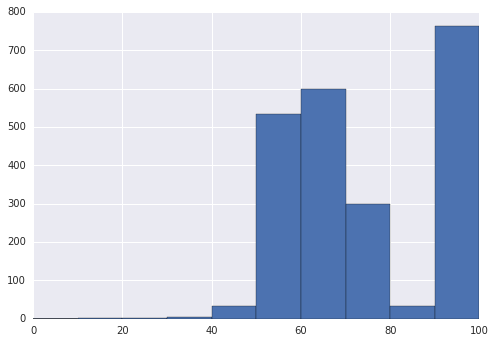

time: 943 ms


In [54]:
keys = ['wiki', 'googleart']
matrix_filepath = 'sim_matrix_wiki-googleart.npy'
if os.path.exists(matrix_filepath):
    sim_matrix['wiki-googleart'] = np.load(matrix_filepath)
else:
    sim_matrix['wiki-googleart'] = compute_sim_matrix(keys, artists_with_years_dict)
    np.save(matrix_filepath, sim_matrix['wiki-googleart'])
best_sim = sim_matrix['wiki-googleart'].max(axis=1)
plt.hist(best_sim)
plt.show()

In [61]:
%autoreload
dataset_names = ['wiki', 'googleart']
sim = sim_matrix['-'.join(dataset_names)]

manually_checked_matches_path = '{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
if os.path.exists(manually_checked_matches_path):
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
    dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]
    sim = fix_sim_matrix(dataset_names, 
                         dfs_to_merge, 
                           sim, 
                           manually_checked_matches_df)
output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format(
            '-'.join(dataset_names))

generate_matches_for_manual_check(dataset_names, [artists_with_years_dict[key] for key in dataset_names], 
                                  sim, min_sim=84,
                                  max_sim=100,
                                  output_path=output_path)

count: 0
0


""


time: 778 ms


In [ ]:
best_sim = sim.max(axis=1)
plt.hist(best_sim)
plt.show()

In [66]:
%autoreload
dataset_names = ['wiki', 'googleart']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

manually_checked_matches_path = '{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
if os.path.exists(manually_checked_matches_path):
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
#     dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]
    sim = fix_sim_matrix(dataset_names, 
                         dfs_to_merge, 
                           sim, 
                           manually_checked_matches_df)

# Transpose matches
# dataset_names = dataset_names[::-1]
# dfs_to_merge = dfs_to_merge[::-1]
# sim = sim.transpose()

results_df = generate_matches_for_manual_check(dataset_names, dfs_to_merge, 
                                               sim, min_sim=100, max_sim=110,
                                               discard_exaclty_matched_dates=False,
                                              min_k=2)
output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names))
results_df.to_csv(output_path, encoding='utf-8')
results_df
# TODO: check all those who don't have exact match in years
# TODO: repeat for wga, artuk

count: 0
0


""


time: 692 ms


In [64]:
dataset_names = ['wga', 'artuk']
sim = sim_matrix['-'.join(dataset_names)]

manually_checked_matches_path = '{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
if os.path.exists(manually_checked_matches_path):
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
    dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]
    sim = fix_sim_matrix(dataset_names, 
                         dfs_to_merge, 
                           sim, 
                           manually_checked_matches_df)
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

results_df = generate_matches_for_manual_check(dataset_names, dfs_to_merge, sim, 
                                     min_sim=85, max_sim=100,
                                     discard_exaclty_matched_dates=True,
                                     min_k=2)
output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names))
results_df.to_csv(output_path, encoding='utf-8')
results_df

count: 0
0


""


time: 7.17 s


In [ ]:
artists_with_years_dict['artuk'][artists_with_years_dict['artuk'].artist_name.str.startswith('carracci, annibale')]

In [ ]:
min_sim=100

dataset_names = ['wiki', 'googleart']
sim = sim_matrix['-'.join(dataset_names)]

manually_checked_matches_path = '{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
if os.path.exists(manually_checked_matches_path):
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
    dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]
    sim = fix_sim_matrix(dataset_names, 
                         dfs_to_merge, 
                           sim, 
                           manually_checked_matches_df)
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]


if len(dfs_to_merge) != 2:
    raise ValueError('I can merge only 2 dataframes')
    assert len(dataset_names) == len(dfs_to_merge)
    assert sim.shape == (len(dfs_to_merge[0]), len(dfs_to_merge[1])), sim.shape
    # match is when sim = 100
    # TODO: combine artist_dataframes according to matches

match_map = defaultdict(list)
matches_df = generate_matches_for_manual_check(dataset_names, dfs_to_merge, sim, min_sim=100,
                                              max_sim=110,
                                              min_k=1,
                                              output_path=None)
assert len(matches_df['artist_id_' + dataset_names[0]].unique()) == len(matches_df)
matched = [set(), set()]
for matched_pair in zip(matches_df['artist_id_' + dataset_names[0]].values,
                matches_df['artist_id_' + dataset_names[1]].values):
    match_map[matched_pair[0]].append(matched_pair[1])
    for i in xrange(2):
        matched[i].add(matched_pair[i])

result_columns = set(dfs_to_merge[0].columns).union(set(dfs_to_merge[1].columns))
result_df = pd.DataFrame(columns=result_columns)

for i in xrange(2):
    non_matched_ids = set(dfs_to_merge[i].index.values) - matched[i]
    result_df = result_df.append(dfs_to_merge[i].loc[list(non_matched_ids)])
assert not result_df.index.has_duplicates
    
    
    

In [ ]:
def combine_artists(objects_list):
    print objects_list
    pass

combined_artists = list()
for artist_id, other_ids in match_map.iteritems():
    print artist_id, other_ids
    artist_objects = dfs_to_merge[0].loc[[artist_id]].to_dict(orient='records') + \
                     dfs_to_merge[1].loc[other_ids].to_dict(orient='records')
    combined_artists.append(combine_artists(artist_objects))

In [ ]:
z = dfs_to_merge[0].loc[['canaletto']].to_dict(orient='records')

In [ ]:
z[0]

In [ ]:
z[1]